In [226]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [227]:
datos_row = pd.read_csv('csv/estado_vacunacion_.csv')

In [228]:
datos_row

,date_pub,ccaa,Dosis entregadas,Dosis administradas,% sobre entregadas,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,2021-01-04,Andalucía,140295,25809,0.183962,3/1/21,2021-01-03,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1,2021-01-04,Aragón,23715,2004,0.084503,2/1/21,2021-01-02,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2,2021-01-04,Asturias,23720,9380,0.395447,3/1/21,2021-01-03,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
3,2021-01-04,Baleares,8940,153,0.017114,28/12/20,2020-12-28,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
4,2021-01-04,Canarias,20835,4846,0.232589,3/1/21,2021-01-03,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...
71,2021-01-08,Murcia,25685,8958,0.348764,NaN,2021-01-08,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
72,2021-01-08,Navarra,11850,3703,0.312489,NaN,2021-01-07,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
73,2021-01-08,País Vasco,31605,9811,0.310426,NaN,2021-01-07,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
74,2021-01-08,Ceuta,1005,637,0.633831,NaN,2021-01-07,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


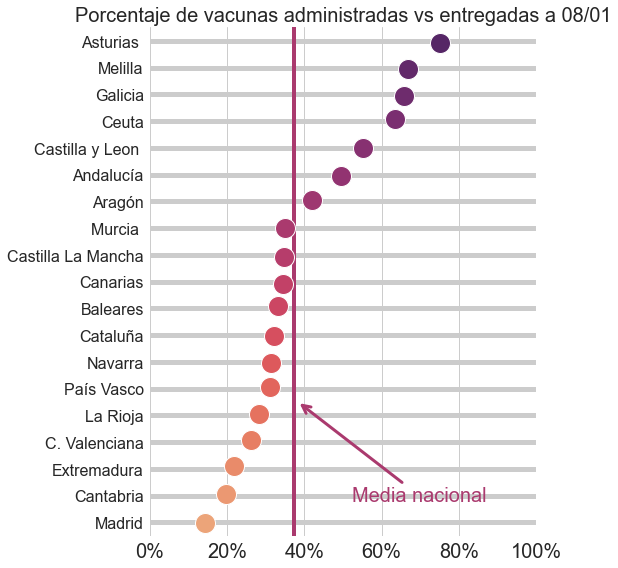

In [241]:

sns.set_style(style="white")
hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(hoy)
datos=datos_row.loc[datos_row['date_pub']=='2021-01-08']
colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()

#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=4,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,13.5), va='center', xytext=(media*1.4,17),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)

sns.despine(left=True, bottom=True)

g.fig.subplots_adjust(top=.95,bottom=.05) 
g.fig.tight_layout()

g.fig.savefig('graficos/estado_vacunas_comunidad.png',dpi=100)

In [233]:
datos=datos_row.loc[datos_row['date_pub']=='2021-01-08']

In [234]:
mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()


In [235]:
mas_cercano

71

In [236]:
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)


In [237]:
color_media = colores[indice_color_media]

In [238]:
color_media

(0.66635279, 0.22717328, 0.43008427)